In [37]:
# import pandas as pd
# import csv
import numpy as np
import matplotlib.pyplot as plt

In [150]:
from datetime import datetime

In [371]:
import seaborn as sns
# import miceforest as mf
import random
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.impute import KNNImputer

In [ ]:
## Opening Datasets

In [3]:
data_adm = pd.read_csv("admissions.csv")


In [6]:
data_conflic = pd.read_csv("conflict.csv")


In [8]:
data_covid = pd.read_csv("covid.csv")


In [10]:
data_risk = pd.read_csv("FSNAU_riskfactors.csv")


In [12]:
data_ipc = pd.read_csv("ipc.csv")


In [14]:
data_ipc2 = pd.read_csv("ipc2.csv")

In [15]:
data_locations = pd.read_csv("locations.csv")


In [17]:
data_prev = pd.read_csv("prevalence_estimates.csv")


In [287]:
data_prod = pd.read_csv("production.csv")


In [50]:
data_area = pd.read_excel("area_data.xlsx")


In [ ]:
# Admission levels of MAM SAM

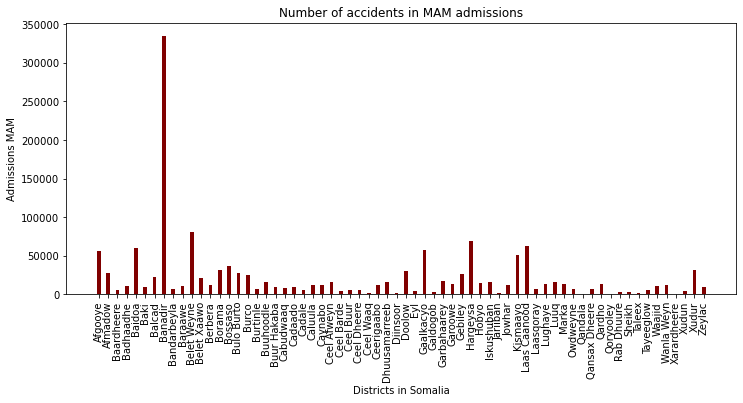

In [48]:
# creating the bar plot for Moderate Accurate Malnutrition

plt.bar(district['district'], district['MAM_admissions'], color ='maroon',
        width = 0.4)
plt.xlabel("Districts in Somalia")
plt.xticks(rotation=90)
plt.ylabel("Admissions MAM")
plt.title("Number of accidents in MAM admissions")
plt.gcf().set_size_inches(12, 5)
plt.show()
 

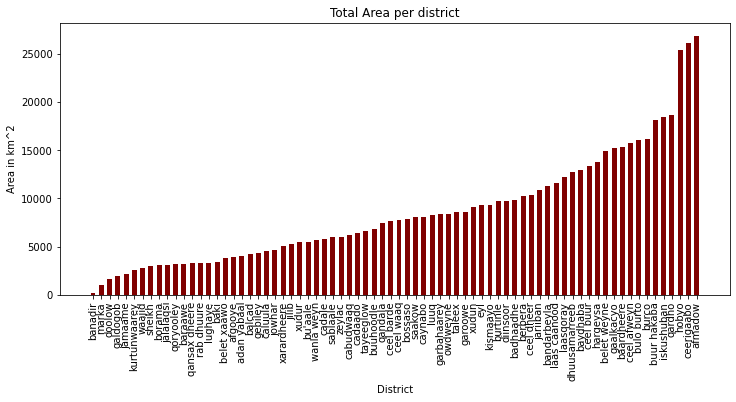

In [105]:
# Area of Somalia size and soil --> Explores the climate indicators and 

tup = sorted(list(zip(data_area['district'],data_area['area'])), key=lambda x: x[1])

plt.bar([i[0] for i in tup], [i[1] for i in tup], color ='maroon',
        width = 0.6)
plt.xlabel("District")
plt.xticks(rotation=90)
plt.ylabel("Area in km^2")
plt.title("Total Area per district")
plt.gcf().set_size_inches(12, 5)
plt.show()

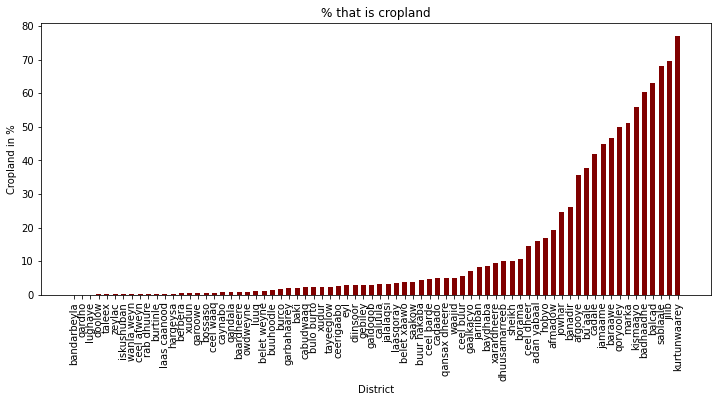

In [134]:
# Percentage of Land that is Crop and Pasture Land

tup =  sorted(list(zip(data_area['district'],data_area['cropland_pct'])), key=lambda x: x[1])
plt.bar([i[0] for i in tup], [i[1] for i in tup], color ='maroon',
        width = 0.6)
plt.xlabel("District")
plt.xticks(rotation=90)
plt.ylabel("Cropland in %")
plt.title("% that is cropland")
plt.gcf().set_size_inches(12, 5)
plt.show()

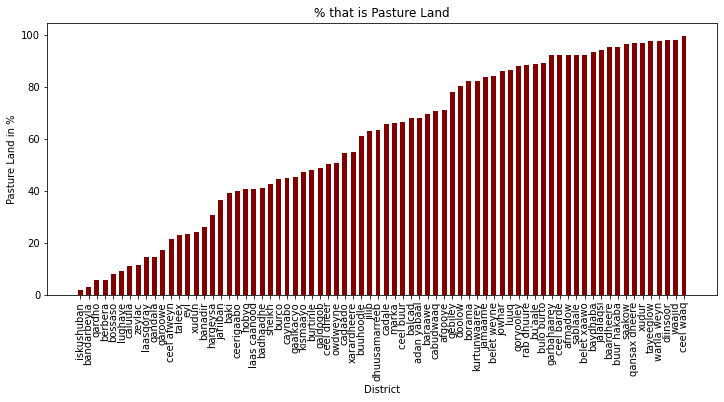

In [135]:
tup =  sorted(list(zip(data_area['district'],data_area['pasture_pct'])), key=lambda x: x[1])
plt.bar([i[0] for i in tup], [i[1] for i in tup], color ='maroon',
        width = 0.6)
plt.xlabel("District")
plt.xticks(rotation=90)
plt.ylabel("Pasture Land in %")
plt.title("% that is Pasture Land")
plt.gcf().set_size_inches(12, 5)
plt.show()

In [221]:
# Processing
data_prod['Date'] = pd.to_datetime(data_prod['date'])
data_area['district'] = [i.lower() for i in data_area['district']]
data_prod['district'] = [i.lower() for i in data_prod['district']]

prod = data_prod[data_prod['district'].isin(data_area['district'].unique())]



In [241]:
def graph_prev(district:str):
    """Graph the Date with GAM Prevalnce"""
    
    df = prod.loc[prod['district'] == '{}'.format(district)]
    
    plt.plot(df['date'],df['GAM Prevalence'])
    plt.title('GAM Prev over time for {}'.format(district))
    plt.xlabel('Date', labelpad=8)
    plt.ylabel('GAM Prevalence')
    plt.grid(True)

    plt.show()

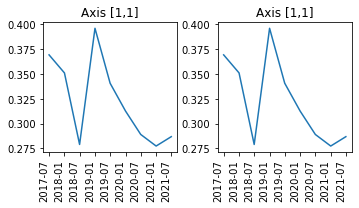

In [219]:
def graphs_display():
    """ This function returns many rows of graphs of GAM with prevlance"""
    df = []
    
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(5, 3))
    axes[0,1].plot(adan['Date'], adan['GAM Prevalence'])
    axes[0].set_title('Axis [1,1]')
    axes[1].plot(adan['Date'], adan['GAM Prevalence'])
    axes[1].set_title('Axis [1,1]')
    fig.autofmt_xdate(rotation=90)
    fig.tight_layout()

In [282]:
lst1 = prod['district'].unique()[:15]
lst2 = prod['district'].unique()[15:30]
lst3 = prod['district'].unique()[30:45]
lst4 = prod['district'].unique()[45:60]
lst5 = prod['district'].unique()[60:45]

In [283]:
def graphs_in_fig(lst):
    
    """Creating a subplots of all districts """ 

    prodd = prod[['district', 'GAM Prevalence', 'Date']].set_index('Date')

    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("GAM Prevalnce with different districts", fontsize=18, y=0.95)

    # loop through the length of tickers and keep track of index
    for n, ticker in enumerate(lst):
        # add a new subplot iteratively
        ax = plt.subplot(3, 5, n + 1)

        # filter df and plot ticker on the new subplot axis
        prodd[prodd["district"] == ticker].plot(ax=ax)

        # chart formatting
        ax.set_title(ticker.upper())
        ax.get_legend().remove()
        ax.set_xlabel("")

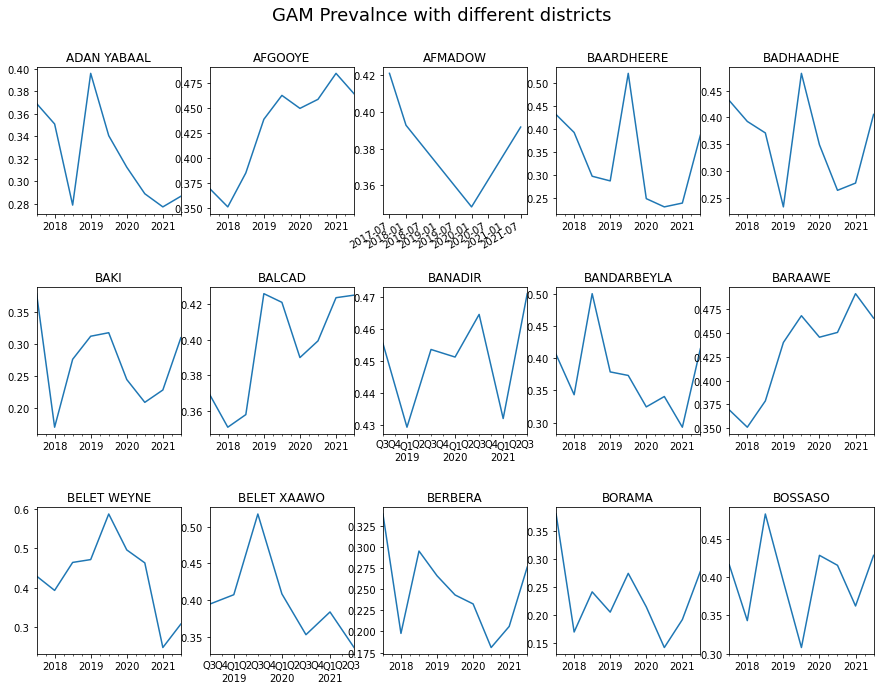

In [284]:
graphs_in_fig(lst1)

In [291]:
data_prod.loc[data_prod['district'] == 'Adan Yabaal'] ## Dropping crops as mostly they grow livestock

In [293]:
climate = pd.read_csv("climate-change_som.csv")

In [318]:
data_ipc['level1_name'].unique()



array(['Awdal', 'Bakool', 'Banadir', 'Bari', 'Bay', 'Galgaduud', 'Gedo',
       'Hiraan', 'Juba Dhexe', 'Juba Hoose', 'Mudug', 'Nugaal', 'Sanaag',
       'Shabelle Dhexe', 'Shabelle Hoose', 'Sool', 'Togdheer',
       'Woqooyi Galbeed'], dtype=object)

### Imputing Values

In [352]:
def high_nan(df):
    high_nan = []
    for i in df.loc[:, df.isna().any()].columns:
        if df[i].isna().sum()/len(df) >= 0.3:
            high_nan.append(i)
    return high_nan


In [437]:
# high_nans = high_nan(data_risk), high_nan(data_prod), high_nan(data_risk), high_nan(data_conflic)
high_nan(data_risk)

['Price of water',
 'Sorghum prices',
 'Maize prices',
 'Measles Cases',
 'AWD/cholera cases',
 'AWD/Cholera deaths',
 'Malaria Cases',
 'Insecurity - Incidents',
 'Insecurity - Fatalities',
 'Displacement (arrivals)']

In [419]:
# Looking at Conflict Data
# Anlysis on Production data
values_tobe_computed = data_prod.groupby(['date']).mean(['Cowpea',
 'Ground Nuts',
 'Maize',
 'Onion',
 'Pepper',
 'Rice',
 'Sesame',
 'Sorghum',
 'Tomato',
 'Water Melon'])



In [396]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 8], [np.nan, 3], [7, 6]])

X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         5.66666667]
 [7.         6.        ]]


In [401]:
# Playing around with imputation
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Create a sample point cloud.
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.05, 0.10, 0.85],
                           class_sep=2, random_state=0)

# Select indices to drop labels from.
X_l = X.shape[0]
np.random.seed(42)
unl_idx = np.random.randint(0, len(X), size=X_l - 500)

# Back the labels up and drop them.
y = y.astype('float64')
X_train, y_train = X[unl_idx].copy(), y[unl_idx].copy()
X[unl_idx] = np.nan
y[unl_idx] = np.nan

# The fancyimpute package takes a single combined matrix as input. It differs in this from the X feature matrix, y response vector style of sklearn.
f = np.hstack((X, y[:, None]))

# Impute the missing values.
from fancyimpute import MICE
trans = MICE(verbose=False)
f_complete = trans.complete(f)

In [407]:
# from fancyimpute import IterativeImputer as MICE
MICE().fit_transform(f)

array([[ 1.86242021, -1.9634769 ,  2.        ],
       [ 1.81284595, -1.35881049,  1.78773359],
       [ 1.81284595, -1.35881049,  1.78773359],
       ...,
       [ 1.81284595, -1.35881049,  1.78773359],
       [ 1.81284595, -1.35881049,  1.78773359],
       [ 2.99589648, -0.45716306,  2.        ]])

In [433]:
# Getting the dates, to put as index
dates = values_tobe_computed.reset_index()['date']

In [423]:
computed_crops = MICE().fit_transform(values_tobe_computed)
# Here each item in the list represents a row in the dataframe

/Users/jasbindrasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [429]:
df_computed_crops = pd.DataFrame(computed_crops, columns = [i for i in values_tobe_computed.columns])

In [435]:
df_computed_crops = df_computed_crops.set_index(dates)

In [436]:
df_computed_crops.to_csv("Computed_Values_Crops", sep='\t')

In [438]:
# Imputation of Data Risk
data_risk.head(3)

,date,district,rainfall,ndvi_score,Price of water,Sorghum prices,Maize prices,Red Rice prices,New Admissions (GAM),Measles Cases,AWD/cholera cases,AWD/Cholera deaths,Malaria Cases,Insecurity - Incidents,Insecurity - Fatalities,Displacement (arrivals),Displacement (departures),Total alarms
0,2021-12-01,Mogadishu,0.27,0.22,NaN,9.95,13.95,13.5,10.271,160.0,937.0,NaN,7.0,51.0,42.0,56300 - 56400,9900 - 10000,12
1,2021-12-01,Afgooye,2.33,0.35,NaN,13.50,13.50,16,1.649,NaN,22.0,NaN,NaN,47.0,26.0,400 - 500,3000 - 3100,7
2,2021-12-01,Bossaso,2.79,0.18,15.0,48.00,NaN,28,1.257,NaN,NaN,NaN,2.0,4.0,20.0,13700 - 13800,16200 - 16300,9


In [448]:
# Uncomputed dataframe of data risk and the dataframe is sorted by date 
un_df_risk = data_risk[['date','district','Price of water',
 'Sorghum prices',
 'Maize prices',
 'Measles Cases',
 'AWD/cholera cases',
 'AWD/Cholera deaths',
 'Malaria Cases',
 'Insecurity - Incidents',
 'Insecurity - Fatalities',
 'Displacement (arrivals)']]

# Convert date into date format 
un_df_risk['date'] = pd.to_datetime(un_df_risk['date'])
un_df_risk = un_df_risk.sort_values(by='date')

<ipython-input-448-679093916717>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  un_df_risk['date'] = pd.to_datetime(un_df_risk['date'])


In [453]:
# Look it distribution for District and Date so when and where
un_df_risk

,date,district,Price of water,Sorghum prices,Maize prices,Measles Cases,AWD/cholera cases,AWD/Cholera deaths,Malaria Cases,Insecurity - Incidents,Insecurity - Fatalities,Displacement (arrivals)
4439,2017-01-01,Jamaame,10.00,NaN,9.00,11.0,NaN,NaN,33.0,NaN,NaN,0 - 100
4385,2017-01-01,Bandarbeyla,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4386,2017-01-01,Caluula,20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4387,2017-01-01,Iskushuban,30.00,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,1000 - 1100
4388,2017-01-01,Qandala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
51,2021-12-01,Sablaale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,2021-12-01,Wanla Weyn,6.50,12.00,12.00,NaN,NaN,NaN,NaN,NaN,NaN,100 - 200
53,2021-12-01,Bu'aale,50.00,17.00,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,2021-12-01,Adan Yabaal,15.25,23.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200 - 300


In [458]:
df1 = pd.DataFrame({'A' : ['James', 'Mary', 'John', 'John'],
                    'B' : [30, 37, 30, 35],
                    'C' : [30, 37, 30, 35]})

un_df_risk.groupby('date').agg({'Price of water':list, 'Sorghum prices': list,
                               'Maize prices':list, 'Measles Cases':list, 'AWD/cholera cases':list,
                               'Malaria Cases':list, 'Insecurity - Incidents':list, 
                                'Insecurity - Fatalities':list,'Displacement (arrivals)':list})

,Price of water,Sorghum prices,Maize prices,Measles Cases,AWD/cholera cases,Malaria Cases,Insecurity - Incidents,Insecurity - Fatalities,Displacement (arrivals)
date,,,,,,,,,
2017-01-01,"[10.0, 30.0, 20.0, 30.0, nan, nan, 4.0, 72.5, ...","[nan, nan, nan, nan, nan, nan, 28.0, 27.0, 30....","[9.0, nan, nan, nan, nan, nan, 28.5, nan, nan,...","[11.0, nan, nan, nan, nan, 1.0, 3.0, 1.0, nan,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[33.0, nan, nan, nan, nan, 12.0, 1.0, nan, nan...","[nan, nan, nan, 2.0, 2.0, 1.0, 3.0, nan, nan, ...","[nan, nan, nan, 3.0, 8.0, 0.0, 1.0, nan, nan, ...","[0 - 100, nan, nan, 1000 - 1100, nan, 200 - 30..."
2017-02-01,"[4.0, 30.0, 20.0, 30.0, nan, nan, 85.0, 15.0, ...","[28.0, nan, nan, nan, nan, nan, 27.0, nan, 18....","[28.5, nan, nan, nan, nan, nan, nan, 16.0, 24....","[2.0, nan, nan, nan, nan, nan, 1.0, 4.0, 141.0...","[437.0, nan, nan, nan, nan, nan, nan, nan, 53....","[1.0, nan, nan, nan, nan, 10.0, nan, 102.0, na...","[2.0, nan, nan, nan, 2.0, nan, nan, 2.0, 11.0,...","[0.0, nan, nan, nan, 0.0, nan, nan, 2.0, 15.0,...","[100 - 200, nan, nan, 700 - 800, 0 - 100, 1500..."
2017-03-01,"[30.0, 20.0, 30.0, nan, nan, 4.0, nan, 15.0, 2...","[nan, nan, nan, nan, nan, 27.5, 27.0, nan, 20....","[nan, nan, nan, nan, nan, 24.0, nan, 16.0, 21....","[nan, nan, nan, nan, nan, nan, nan, 1.0, 262.0...","[nan, nan, nan, nan, nan, 267.0, 76.0, nan, 35...","[nan, nan, nan, nan, nan, nan, nan, 98.0, 1.0,...","[nan, nan, nan, 2.0, 1.0, 2.0, nan, 1.0, 4.0, ...","[nan, nan, nan, 1.0, 0.0, 0.0, nan, 2.0, 2.0, ...","[nan, nan, 100 - 200, 0 - 100, 5300 - 5400, 10..."
2017-04-01,"[30.0, 20.0, 30.0, nan, nan, 4.25, nan, 17.0, ...","[nan, nan, nan, nan, nan, 27.0, 24.5, nan, 20....","[nan, nan, nan, nan, nan, 23.5, nan, 14.0, 20....","[nan, nan, nan, nan, nan, nan, nan, 6.0, 623.0...","[nan, nan, nan, nan, nan, nan, nan, 695.0, nan...","[nan, nan, nan, nan, nan, nan, nan, 106.0, nan...","[nan, nan, nan, 1.0, 1.0, 3.0, nan, nan, 11.0,...","[nan, nan, nan, 0.0, 1.0, 1.0, nan, nan, 7.0, ...","[nan, 200 - 300, nan, nan, 2000 - 2100, 100 - ..."
2017-05-01,"[30.0, 20.0, 30.0, nan, nan, 4.25, nan, 15.0, ...","[nan, nan, nan, nan, nan, 25.5, 22.4, nan, 28....","[nan, nan, nan, nan, nan, 22.0, nan, 14.0, 28....","[nan, nan, nan, nan, nan, nan, nan, nan, 692.0...","[nan, nan, nan, nan, nan, nan, nan, 806.0, nan...","[nan, nan, nan, nan, nan, nan, nan, 121.0, nan...","[nan, nan, nan, 1.0, nan, 1.0, nan, 2.0, 10.0,...","[nan, nan, nan, 0.0, nan, 0.0, nan, 4.0, 18.0,...","[nan, nan, nan, nan, 100 - 200, nan, nan, nan,..."
2017-06-01,"[30.0, 20.0, 30.0, nan, nan, 4.25, nan, 15.0, ...","[nan, nan, nan, nan, nan, 26.0, nan, nan, 20.0...","[nan, nan, nan, nan, nan, 22.5, nan, nan, 20.0...","[1.0, nan, 2.0, nan, 61.0, 14.0, nan, 8.0, 381...","[2.0, nan, 2.0, nan, 404.0, 15.0, nan, 21.0, 1...","[2.0, nan, 4.0, nan, 9.0, 6.0, nan, 84.0, nan,...","[nan, 1.0, 2.0, 6.0, nan, 1.0, nan, 2.0, 8.0, ...","[nan, 0.0, 73.0, 17.0, nan, 0.0, nan, 3.0, 11....","[nan, nan, nan, nan, 0 - 100, 300 - 400, nan, ..."
2017-07-01,"[30.0, 20.0, 30.0, nan, nan, 4.25, nan, 15.0, ...","[nan, nan, nan, nan, nan, 24.0, nan, nan, 20.0...","[nan, nan, nan, nan, nan, 22.0, nan, nan, 20.0...","[nan, nan, 153.0, nan, 152.0, nan, nan, 42.0, ...","[nan, nan, nan, nan, 139.0, nan, nan, 140.0, n...","[nan, nan, nan, nan, 9.0, nan, nan, 88.0, nan,...","[nan, nan, nan, nan, 1.0, 1.0, nan, 2.0, 13.0,...","[nan, nan, nan, nan, 2.0, 1.0, nan, 0.0, 13.0,...","[nan, nan, nan, nan, 100 - 200, 1900 - 2000, 0..."
2017-08-01,"[30.0, 20.0, 30.0, nan, nan, 4.25, nan, 15.0, ...","[nan, nan, nan, nan, nan, 23.5, nan, nan, 18.0...","[nan, nan, nan, nan, nan, 21.5, nan, nan, 20.0...","[nan, 5.0, nan, nan, 48.0, 101.0, nan, nan, 77...","[nan, nan, nan, nan, nan, nan, nan, 10.0, 29.0...","[nan, nan, nan, nan, 1.0, 1.0, nan, 50.0, nan,...","[nan, 1.0, nan, nan, nan, 1.0, nan, 11.0, 10.0...","[nan, 0.0, nan, nan, nan, 10.0, nan, 28.0, 23....","[nan, nan, nan, nan, 100 - 200, nan, nan, na

In [462]:
# df1.groupby('A').agg({'B':'sum', 'C':'value_counts'})
un_df_risk.groupby('date').mean('Price of water')

def nr_nan():
    
    """Returns the total number of nan values for that entry """
    un_df_risk['{}'.format(column)].isna().groupby(un_df_risk.district).sum().reset_index()

,Price of water,Sorghum prices,Maize prices,Measles Cases,AWD/cholera cases,AWD/Cholera deaths,Malaria Cases,Insecurity - Incidents,Insecurity - Fatalities
date,,,,,,,,,
2017-01-01,31.634259,12.603114,11.711707,69.100000,111.229533,7.833333,66.171222,5.400000,10.280000
2017-02-01,32.805556,12.884239,11.354075,23.750000,162.396684,11.333333,50.906231,5.131579,8.026316
2017-03-01,27.910714,13.419857,11.541667,45.611111,239.189083,12.100000,77.777778,5.225000,9.125000
2017-04-01,26.962500,13.729333,12.126073,88.000000,295.087958,6.000000,84.318182,5.902439,11.536585
2017-05-01,21.527500,14.277951,12.435756,89.882353,221.042655,6.181818,72.060606,6.162162,10.513514
2017-06-01,21.831250,13.671769,12.230143,60.833333,135.381571,9.333333,48.933741,6.350000,13.400000
2017-07-01,22.731250,13.080625,11.986900,64.666667,154.000000,5.000000,112.562500,5.714286,11.428571
2017-08-01,22.381250,12.380769,11.246050,15.861111,45.260870,NaN,31.250000,6.139535,9.395349
2017-09-01,22.990625,12.444558,10.758550,28.428571,32.500000,NaN,55.500000,6.952381,11.214286


In [483]:
tri = un_df_risk['Price of water'].isna().groupby(un_df_risk.district).sum().reset_index()
tri['% nan'] = [(i/60)*100 for i in tri['Price of water']]
tri

,district,Price of water,% nan
0,Adan Yabaal,0,0.000000
1,Afgooye,31,51.666667
2,Afmadow,1,1.666667
3,Baardheere,0,0.000000
4,Badhaadhe,60,100.000000
...,...,...,...
69,Wanla Weyn,0,0.000000
70,Xarardheere,0,0.000000
71,Xudun,58,96.666667
72,Xudur,0,0.000000


In [479]:
len(un_df_risk.loc[un_df_risk['district'] == 'Zeylac'])

60